Retrieving all the users into a JSON file users.json

In [21]:
# reading the JSON data using json.load()
import json
import pandas as pd
file = 'feedback_file.json'
with open(file) as train_file:
    user_dic = json.load(train_file)
#columns = [field['name'] for field in data['columns']]

#df = pd.DataFrame(data['data'], columns=columns)
df = pd.DataFrame.from_dict(user_dic, orient='index')
df.transpose()
print(df.head(2))
print(len(df.columns))
maxRat = len(df.columns)
df["ratings"]= maxRat - df.isna().sum(axis = 1)
print(df.head(2))

df["ratings"].describe()

                                      0           1           2           3   \
AFY3AKGKKUYJVPWOWZABOAESMCUA  B01N02V81B  B01H54X6CM  B0714KCRMX  B01EB8Y6CY   
AGEM3FBCF5MY4ZZAQHBA4RUB3UTA  B07461JP4V  B0169X2TL4  B005UVM368  B00F13RJ64   

                                      4           5           6           7   \
AFY3AKGKKUYJVPWOWZABOAESMCUA  B0161ICQBK  B01F9CIWMQ  B011PGCVOK  B00QMSA4MS   
AGEM3FBCF5MY4ZZAQHBA4RUB3UTA  B0757KY56V  B07BXMVTVM  B07DPK5J6N  B01I331AFE   

                                      8           9   ...    15    16    17  \
AFY3AKGKKUYJVPWOWZABOAESMCUA  B015YT294Q        None  ...  None  None  None   
AGEM3FBCF5MY4ZZAQHBA4RUB3UTA  B01K4JHQUI  B01M8LNN2N  ...  None  None  None   

                                18    19    20    21    22    23    24  
AFY3AKGKKUYJVPWOWZABOAESMCUA  None  None  None  None  None  None  None  
AGEM3FBCF5MY4ZZAQHBA4RUB3UTA  None  None  None  None  None  None  None  

[2 rows x 25 columns]
25
                                   

count    1000.000000
mean        9.778000
std         2.977176
min         6.000000
25%         7.000000
50%         9.000000
75%        12.000000
max        25.000000
Name: ratings, dtype: float64

In [10]:
# reading the JSON data using json.load()
import json
import pandas as pd
file = 'feedback_file.json'
with open(file) as train_file:
    user_dic = json.load(train_file)

user_ids = list(user_dic.keys())
for i in range(20):
    print(user_ids[i])
#user_ids_json= json.dumps(list)
dictOfUsers = { i : user_ids[i] for i in range(0, len(user_ids) ) }

with open('users.json', 'w', encoding='utf-8') as f:
    json.dump(dictOfUsers, f)
# converting json dataset from dictionary to dataframe
#userItems = pd.DataFrame.from_dict(dict_train, orient='index')
#userItems.reset_index(level=0, inplace=True)
#print(userItems.head(20))

AFY3AKGKKUYJVPWOWZABOAESMCUA
AGEM3FBCF5MY4ZZAQHBA4RUB3UTA
AGVKPCV6LUQJKYRWOLJOF2MROXFQ
AFA5AUB73VCCIL4W4RSKOIZQR7OQ
AEL55NDYNOGJUNQGEBN23AXSBFCQ
AH3USHRFSPPABU5JXKIP4BQS6MCA
AGI6CQRXHZREH75FNHCVLJTPTQ2Q
AEFZUEKCQGGZTCIPRWW3M7PZ62XQ
AF4LIJORBKWKIZFSXW3NITBQ5RLQ
AFI3XN2JILPIV2OFO3PG25J33SPA
AEHNURHUGILLCYTZPZOVDROOS4ZQ
AFDWCE6QFKIDIFDFIHQBLFJWMGMA
AH2FLR72C3TXOMYEXS2L7K3KYGXQ
AFW5T44GC45PI7TEV6Y5IKWI3AAQ
AGLY7ZFFR22OPZJPHJ6KVNYMY52Q
AGUAHN5MV2Y2ESPGCCAQYCBTHPCQ
AHSGU6PMOUA7ZSZCPRPF26DEI35A
AGMQXKRBZ7JSPXAM22TP3Z755IYA
AFTK5ODL2IOQWAKJ2H6FOJ2BSV6Q
AGBCNH2OXA3WZYDPAJOPMARS6UWA


Converting all products to a product list to later be able to get all the thumbnails.

In [16]:
itemsSet = set() # To prevent adding duplicates
for user, items in user_dic.items():
    #Retrieve a list of all its products
    for it in items:
        #print(it)
        itemsSet.add(it)
    

itemsList = list(itemsSet)
print(len(itemsList))
for i in range(10):
    print(itemsList[i])

#print(itemsList)
dictOfItems = { i : itemsList[i] for i in range(0, len(itemsList) ) }

with open('items.json', 'w', encoding='utf-8') as f:
    json.dump(dictOfItems, f)

9006
B015G2E9LW
B00O3OSIIK
B00GXM5VDA
B00HWFCFPO
B005GPJ582
B0106XJVCS
B00PYXP4Y0
B01M69DNJG
B01D9JMF2E
B074JDN4N8


In [22]:
#from amazon.api import AmazonAPI
from bs4 import BeautifulSoup
import requests
#product = amazon.lookup(ItemId='B00QG6LP06', ResponseGroup='Images')
resp1 = requests.get('https://www.amazon.com/dp/B00FQGP20Q/').content

soup = BeautifulSoup(resp1)#make soup that is parse-able by bs
#soup.findAll('landingImage')
soup.findAll('img')

[<img src="https://images-na.ssl-images-amazon.com/captcha/dgbcpgrn/Captcha_ljdyjdvwwx.jpg"/>,
 <img src="https://fls-na.amazon.com/1/oc-csi/1/OP/requestId=AD265DDP51KK55FSTXXZ&amp;js=0"/>]

Populating the interactive namespace from numpy and matplotlib


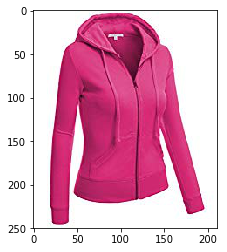

In [1]:
from PIL import Image
import requests
from io import BytesIO
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

response = requests.get('https://ws-na.amazon-adsystem.com/widgets/q?_encoding=UTF8&MarketPlace=US&ASIN=B00EFCZRWU&ServiceVersion=20070822&ID=AsinImage&WS=1&Format=SL250')
img = Image.open(BytesIO(response.content))
#img.save("productImages/sample.jpg")
#img=mpimg.imread('your_image.png')
imgplot = plt.imshow(img)
plt.show()

In [48]:
def scrapImage(itemCode):
    #Convert product id to image
    try:
        url= 'https://ws-na.amazon-adsystem.com/widgets/q?_encoding=UTF8&MarketPlace=US&ASIN='+itemCode+'&ServiceVersion=20070822&ID=AsinImage&WS=1&Format=SL250'
        response = requests.get(url)
        bytesImage=BytesIO(response.content)
        if bytesImage.getbuffer().nbytes > 0:
            img = Image.open(bytesImage)
            img.save("productImages/"+itemCode+".jpg")
            return True
        else:
            return False
    except:
        return False
noImageFound = []
itemId = 'B077YCTXK5'
if (scrapImage(itemId) is False):
    noImageFound.append(itemId)
print("Not succesfull files:")
print(noImageFound)

Not succesfull files:
['B077YCTXK5']


In [49]:

noImageFound = []
for i in range(len(itemsList)):
    itemId = itemsList[i]
    if (scrapImage(itemId) is False):
        noImageFound.append(itemId)

print("Not succesfull files:")
print(noImageFound)    

Not succesfull files:
['B00KXQYSXQ', 'B06VVZWVHQ', 'B07DVPNCSV', 'B00CF185YK', 'B01LZNH7J3', 'B06W5KBR77', 'B07BHGHSN4', 'B06ZYS424Z', 'B076QDRNDD', 'B00CKN7PYE', 'B011AU76ZK', 'B01M698XPA', 'B01GZZFW74', 'B07CKVX1KL', 'B077862W38', 'B07BFSX8C7', 'B077S81XH6', 'B06XK3FFQ8', 'B07283WQM4', 'B06XFCCPYY', 'B07C52QGX3', 'B013QM7OES', 'B01LXRHLI2', 'B071ZFMGPV', 'B0143ZLE8Y', 'B078KPLC8T', 'B07D74VMF4', 'B012V5LM0S', 'B01N1J0H17', 'B01IISQQ94', 'B077WT6KJY', 'B01JSWF0O6', 'B07977VS6Y', 'B01DDP4ZVI', 'B00N6ELQL4', 'B00R6XUF4K', 'B01EFH2GHI', 'B01M0GXZXE', 'B072V7R8VH', 'B01LPG1J98', 'B01EBI0LDC', 'B074H75SJG', 'B06Y459FYY', 'B0767D3Y3V', 'B01M130AI5', 'B00GOL1NXW', 'B0744ZP9N8', 'B01FFB83XO', 'B077J1TTMX', 'B01KUTPSNE', 'B01BEXB1H2', 'B012AJETJ6', 'B00A86RVAS', 'B01AS085L2', 'B01DU4714K', 'B017AKROPG', 'B015HZSGHQ', 'B01EXZJILY', 'B072BN5JH3', 'B019G0JSCA', 'B07F2BXWC8', 'B07GXCKN15', 'B074VS582L', 'B01LG57BMW', 'B01CID1XGQ', 'B0787TRBGX', 'B018HBBO1C', 'B076J5XDRG', 'B07789RLY7', 'B07FYFRVJ1

In [2]:
nonFoundFiles = ['B00KXQYSXQ', 'B06VVZWVHQ', 'B07DVPNCSV', 'B00CF185YK', 'B01LZNH7J3', 'B06W5KBR77', 'B07BHGHSN4', 'B06ZYS424Z', 'B076QDRNDD', 'B00CKN7PYE', 'B011AU76ZK', 'B01M698XPA', 'B01GZZFW74', 'B07CKVX1KL', 'B077862W38', 'B07BFSX8C7', 'B077S81XH6', 'B06XK3FFQ8', 'B07283WQM4', 'B06XFCCPYY', 'B07C52QGX3', 'B013QM7OES', 'B01LXRHLI2', 'B071ZFMGPV', 'B0143ZLE8Y', 'B078KPLC8T', 'B07D74VMF4', 'B012V5LM0S', 'B01N1J0H17', 'B01IISQQ94', 'B077WT6KJY', 'B01JSWF0O6', 'B07977VS6Y', 'B01DDP4ZVI', 'B00N6ELQL4', 'B00R6XUF4K', 'B01EFH2GHI', 'B01M0GXZXE', 'B072V7R8VH', 'B01LPG1J98', 'B01EBI0LDC', 'B074H75SJG', 'B06Y459FYY', 'B0767D3Y3V', 'B01M130AI5', 'B00GOL1NXW', 'B0744ZP9N8', 'B01FFB83XO', 'B077J1TTMX', 'B01KUTPSNE', 'B01BEXB1H2', 'B012AJETJ6', 'B00A86RVAS', 'B01AS085L2', 'B01DU4714K', 'B017AKROPG', 'B015HZSGHQ', 'B01EXZJILY', 'B072BN5JH3', 'B019G0JSCA', 'B07F2BXWC8', 'B07GXCKN15', 'B074VS582L', 'B01LG57BMW', 'B01CID1XGQ', 'B0787TRBGX', 'B018HBBO1C', 'B076J5XDRG', 'B07789RLY7', 'B07FYFRVJ1', 'B078LYHGDJ', 'B07DNZ8YGL', 'B075MWS138', 'B01DKZXMMO', 'B079GXHXVW', 'B00IPTJISI', 'B0789S62N3', 'B076VLCHD1', 'B06XZYDXD3', 'B0772GD23T', 'B0783953K2', 'B01940R88S', 'B074QR6GSX', 'B019NQNCQA', 'B014KHUWJ2', 'B019HR98N6', 'B07JG6BYVL', 'B06ZY5GWGL', 'B01A7WT6E6', 'B07FDLM4WW', 'B071WLZK1K', 'B01ARZDZMW', 'B01N6A78PF', 'B01FWJU03K', 'B01FRGMZM2', 'B00E6RAKIU', 'B0711T3VMC', 'B0754WPYHT', 'B00E0L21RU', 'B07693QX3S', 'B00ZU66WUQ', 'B017K8TG2M', 'B071RPLSTY', 'B0789GJCZ9', 'B01CFFWUL4', 'B0749KK37T', 'B00BPYP7T4', 'B017XIPALU', 'B01M8OA8S0', 'B00H8QYQIG', 'B0788NL7G4', 'B0799JQ8CM', 'B015QETFZ0', 'B0191NXJS6', 'B074Z2HXLJ', 'B0108OM2PI', 'B00TR056GC', 'B06Y2J776P', 'B072J3LX7M', 'B077Z3W7WR', 'B00JPNGM0K', 'B07DDDDNST', 'B01ILVWW32', 'B005HT5YSM', 'B0752TP588', 'B00VGHEY9E', 'B00KKH1HSW', 'B071L31MZV', 'B01KLMUH54', 'B07BKXYRV7', 'B0749G355F', 'B010H3IZ56', 'B075N8VJ4V', 'B002F1ZJ4O', 'B01NCNM3F7', 'B06ZZFLFB1', 'B01DKDL5E8', 'B00PRQCK82', 'B019OC90N2', 'B01A6NYNPS', 'B00WAAD0L4', 'B00VF3ZDWG', 'B01MYT3469', 'B01LZQ7C7K', 'B00U8OCVIM', 'B01HE51TNK', 'B07B8KYPT8', 'B01HSS4V5G', 'B06Y4CY5DZ', 'B0722V2G2J', 'B077Z29V1S', 'B07CG6PVSV', 'B0786B31TD', 'B015YLR5A2', 'B00ACD8O8U', 'B003E6WNAC', 'B015QUBQZG', 'B075F5K86W', 'B016XS1ICG', 'B016W8N00U', 'B019NPF070', 'B01N0Z081N', 'B01ENIFY6E', 'B076J7RGRF', 'B077ZXL4VK', 'B00PVUP1NK', 'B07CKMZZSL', 'B075Q98BB7', 'B01650IB9A', 'B012DKAMS4', 'B00K317FDG', 'B00SA2H440', 'B01M7QQ1R4', 'B01E5EWH0C', 'B01MSX742W', 'B00LK3VQCC', 'B01MS4M5NA', 'B0145KBLXK', 'B01IVQKFX6', 'B075YGK7F6', 'B07CB9M3YQ', 'B00SOMCIVA', 'B01KHLCSJC', 'B07H49SH67', 'B009PMIDBW', 'B078KK65P4', 'B00IMYI60M', 'B073R19GHH', 'B07C1VPLYH', 'B07DY95HRD', 'B074PN522B', 'B00JG6UOKA', 'B06XY2K7VW', 'B0083SVZM8', 'B073WR2W3R', 'B07895BB5X', 'B01LZIT1XE', 'B01DZ11FC2', 'B07CG62BNK', 'B00HIILFPG', 'B078XJYYKS', 'B0744Z9L9N', 'B06Y44BMSL', 'B01NBELGDQ', 'B01B14GXO0', 'B01FN1CUCG', 'B072BY23KM', 'B01MEE44RU', 'B01LX1V2O4', 'B073J5W3TB', 'B01DISNOJE', 'B075F867JN', 'B011JINSXW', 'B072V4QMCV', 'B01IHHZXIQ', 'B07CWQC7TS', 'B018L15EDM', 'B01ASQXEGM', 'B078GMYXFV', 'B06XQ2MBX1', 'B00E9AF7HS', 'B01EMM2TP0', 'B00WL04LD4', 'B00FHO53OW', 'B01LZ8JIYP', 'B00Y7Z27AK', 'B01MR8AFLZ', 'B06X3W6PVP', 'B00I8NZWZY', 'B07C7Y78LY', 'B079KTBT49', 'B00UO1BPNG', 'B00IB2H1Y2', 'B01MRY0FN9', 'B07J2ZTMPS', 'B01LY7Y9CM', 'B007G4MFZG', 'B01EBS4MQY', 'B07CK335HL', 'B00IOB8PQ8', 'B07D4G4SKP', 'B01MYE5TL2', 'B019REIGIM', 'B0175YYSGK', 'B01IU8NMNU', 'B0756T2Q9D', 'B07552W4C5', 'B0783QPSK2', 'B01F5R7RUS', 'B078R55CZN', 'B071R6M6LC', 'B07CC9KWBG', 'B00WUBBVUA', 'B013DW2F7W', 'B074DCR5ZG', 'B00E5PWTA0', 'B018U34PCC', 'B0799RMLVN', 'B0779226FF', 'B07DN3DKC2', 'B00EZECDRU', 'B01FDM048M', 'B075YSW4KR', 'B075YHYM2N', 'B01A8C2STA', 'B01330T3ZQ', 'B071D557H2', 'B07C1RQNF3', 'B0192QCLFY', 'B0748F1HZJ', 'B00XQDCQIM', 'B075HVQ8JN', 'B0754TMRLR', 'B00NL1DMX2', 'B01BMTQQR8', 'B076MP62J6', 'B01BA3NY0S', 'B00I8JEVO6', 'B015RPK15Q', 'B071JYC3BJ', 'B01IFQLNX8', 'B06XXK6V6Q', 'B00NULRC2A', 'B072V6RXRT', 'B0785HN8BX', 'B0713QG45Y', 'B074KMXVTF', 'B019MKWUWY', 'B077HRSQSD', 'B01M0DKLNS', 'B01M28AL82', 'B01IWX9SV8', 'B071KCNXSZ', 'B011W8H91Q', 'B07BWN34JQ', 'B07426D5DK', 'B07651CF6N', 'B07D3TLHFQ', 'B07BBXL1JT', 'B01AUWXEKK', 'B077W62HX3', 'B00VK99RX6', 'B01IL0FJYM', 'B076V4PQRY', 'B00V68YWN6', 'B072LXR6SY', 'B077TLV1X2', 'B00FHM9TVW', 'B075XL3ZTY', 'B01GRNC4MA', 'B07CS4K994', 'B01MRNT8LX', 'B01G0W9JKI', 'B07G9549YP', 'B07BXBKG99', 'B00PLT20AI', 'B074VZYH1T', 'B01N947LU8', 'B01MRUGS3N', 'B00CUBK7N2', 'B07DZXNBK4', 'B07CV71VRP', 'B07D56V4ND', 'B078WRXBZZ', 'B01N44AR9C', 'B01K38F5PS', 'B07D3RM3P6', 'B06ZZN82P9', 'B01NA02SA7', 'B00PDDV7OW', 'B07CFWHXHH', 'B00N17H6X8', 'B07BGXXS7C', 'B00RYUAHG6', 'B00P3IHW46', 'B07J9WM8Q4', 'B07922NVP7', 'B074Z7BZHF', 'B01AX1S4Z8', 'B01C0RTR3Q', 'B019HMIZ1M', 'B01M0FWRGT', 'B0797HTS4X', 'B018M12TKM', 'B06W55DYHL', 'B01306NPVQ', 'B06ZYHVQVL', 'B01M71RHKC', 'B074HBLNN6', 'B07BNH6RZ7', 'B01E5WZN46', 'B01K17ZLQ4', 'B01HJM1KTG', 'B0772P541K', 'B0765SFXWY', 'B073W21W3G', 'B078HKBKJS', 'B079NVX2F3', 'B078TKGMF1', 'B0777GH5QK', 'B0781JXM53', 'B014C0BD6I', 'B07D9G36V2', 'B01BURANY4', 'B0727Q7YQH', 'B00W9GR7WC', 'B006WMAE1U', 'B00MP5NOKQ', 'B0762QKM4H', 'B01LJ38LV6', 'B01KGTD26I', 'B015NU3TAO', 'B077XGFHNW', 'B00CUZW4TS', 'B00ZQXKMOU', 'B01LY52EY2', 'B076ZD8YH8', 'B00L3XU1VQ', 'B01KHLD544', 'B071SH85C7', 'B07GNLWYVY', 'B01DPRH476', 'B01E7QR3P2', 'B00S32J7CE', 'B07C3K46LN', 'B077PN4WBT', 'B071RPC7PW', 'B01C2TOYKI', 'B01AC8NXZ8', 'B01KT5DW8C', 'B07BSCKDPR', 'B0746GJW4K', 'B074FVRT2G', 'B00CZCA7RM', 'B00N26S8XU', 'B005IZD644', 'B01FY84JKO', 'B079XY94Y6', 'B01MDOWRYZ', 'B01KHE1CVY', 'B06ZYS3ZMH', 'B01N1QETLW', 'B076ZJBN14', 'B01BXWR70E', 'B079L2MWHS', 'B078BFSRHR', 'B0185HQRAQ', 'B07CF32V9D', 'B01M7NI6CW', 'B075MDTL4V', 'B00FOC239K', 'B071YP37PK', 'B0761S8R72', 'B0788HRDVP', 'B019E5XJAO', 'B07DKSB7TC', 'B07CSKP1VQ', 'B00VO051J0', 'B01236P2MO', 'B01C5YB62O', 'B01H9TCSJ0', 'B07FZ5DHL8', 'B00FJ3Q52A', 'B0187XS0IA', 'B07HLHL65D', 'B01877ZYJ4', 'B01N21OB9A', 'B00MRLMA6M', 'B015ZBOLLW', 'B01L1O6H3M', 'B00DEWVKA0', 'B06XTLBW5J', 'B0785QT93V', 'B00Q9LM7D2', 'B075TGTX8P', 'B00VVNWOHM', 'B076P8FD6X', 'B07G74PH84', 'B01ETVTSIA', 'B01M8OBTWM', 'B014KPWV98', 'B00C80KO74', 'B017UVT3VI', 'B077YCTXK5', 'B00IMV2L7E', 'B0788RZFKZ', 'B07BXHQBJ1', 'B01IO3P9O6', 'B071Z935T3', 'B01M047R6M', 'B071CZX7QK', 'B01CETRBK6', 'B01GIEZYQG', 'B06WLMGHG3']
print(len(nonFoundFiles))

454
